# Logisitc Regression Analysis:
## _An Example Model Predicting Survival Aboard the Titanic_
---

Prepared By: Jason Schenck  
Date: February 20th 2017  
CSC-570 Data Science Essentials


<br>
<big>Table Of Contents</big>

---
* [1 Introduction][Introduction]  


* [2 Data Preparation][Data Preparation]


* [3 Model Defining][Model Defining]


* [4 Results: Model Scoring][Results: Model Scoring]

---

[Introduction]: #1.-Introduction
[Data Preparation]: #2.-Data-Preparation
[Model Defining]: #3.-Model-Defining
[Results: Model Scoring]: #4.-Results:-Model-Scoring

### 1. Introduction

Previously, I performed an EDA (Exploratory Data Analysis) on the Titanic Survival dataset provided by Kaggle. In this analysis I will be continuing forward with Logistic Regression Analysis. I've implemented a custom function that will determine the best set of features to include as 'X' based on highest AUC.

I'll begin first, by preparing the data for analysis which consists of the following steps:

1. Choosing some set of independent features to work with, X
2. Correcting all missing values
3. One hot encoding for any categorical variables with respect to majority distribution from EDA.
4. Scaling the data
5. Splitting the data with a 20% holdout 

Once the data frame is properly created and scaled accordingly, A logistic model is defined and passed the training data to generate predictions. Finally, I will measure the accuracy of my model by examing the AUC (Area Under Curve) score generated and plot this inline. 


### 2. Data Preparation

In [1]:
# Imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import itertools
%pylab inline

/Users/jasonschenck/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import the data
X = pd.read_csv("../data/train.csv")
y = X.pop("Survived")

In [4]:
# Print the new DF
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Feature Assumptions from _[previous EDA](https://nbviewer.jupyter.org/github/JDSchenck/CSC570-DataSci/blob/master/Titanic%20EDA/EDA-Titanic.ipynb)_:
> - **Sex**: Categorical, binary, classes: 'male' or 'female', distribution male = ~65%, female = ~35%, No missing values.
> - **Age**: Continuous, std dev = ~14.53, mean = ~30, _177 Missing values_
> - **Pclass**: Categorical, three classes: '1', '2', or '3' , distribution 1 = ~24%, 2 = ~21%, 3 = ~55%, No missing values.
> - **SibSp**: Continuous(small range of 0 to 8), mean = ~0.52 , mode = 0, std dev = ~1.1, _Var has bias_, No missing values.
> - **Parch**: Continuous (small range of 0 to 6), mean = ~0.38, mode = 0, std dev = ~0.81, _Var has bias_, No missing values
> - **Fare**: Continuous (range from 0 to ~512.33), mean = ~32.20, std dev = ~49.69, Value in currency Pounds, No missing values.
> - **Embarked**: Categorical, three categories of ports ('S')outhampton, ('C')herbourg, and ('Q')ueenstown, distribution heavily to 'S', _2 missing values_.
> - **Survived**: Categorical, binary 0 = no, 1 = yes for survived. Dependent variable (y) for predicton model. No missing values.

Using the above information from EDA, I will start by handling missing values.

In [5]:
# Age: 177 missing values -- Use mean age to fill in for the missing age values. Get exact mean.

mean_age = X.Age.mean()
print(mean_age)

29.69911764705882


In [6]:
# Replace all missing ages with the mean age.
# Note: This is not the BEST possible strategy, but is better than dropping 177 observations completely.

X.Age = X.Age.fillna(value=mean_age)

In [7]:
# Check for missing
X[X.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Now for the Embarked missing values, recall _[from my EDA](https://nbviewer.jupyter.org/github/JDSchenck/CSC570-DataSci/blob/master/Titanic%20EDA/EDA-Titanic.ipynb#2.1.7-Embarked)_:
>"Two passengers with missing Embarked values. Both of which survived. **_But how can a passenger not have a port of embarkation?_** Interesting. Since there's only two, I performed a brief Google search for 'Icard, Miss. Amelie' and found something very interesting! 

>From the _[Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)_:
>"Miss Rose Amélie Icard, 38, was born in Vaucluse, France on 31 October 1872, her father Marc Icard lived at Mafs á Murs (?).

>She boarded the Titanic at Southampton as maid to Mrs George Nelson Stone. She travelled on Mrs Stone's ticket (#113572).

>Mrs Stone and Miss Icard were rescued by the Carpathia in lifeboat 6."

In [8]:
# Double check for the missing values.
X[X.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# As verified, both of these passengers embarked from Southampton 'S', Set manually.
X.Embarked = X.Embarked.fillna(value='S')

In [10]:
# Ensure corrected
X[X.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Now that all missing values have been accounted for, I will perform one hot encoding on all categorical variables using the majority distribution data uncovered in my original EDA. I will try and keep only the fewest number of encoded categoricals such that they collectively represent >50% of our sample. Dropping all others help to prevent collinearity. 

I also plan to experiment by engineering a new feature, 'TravelingAlone', by combining the data of two existing ones: SibSp and Parch. While tuning the model, perhaps this may be useful.

In [11]:
'''  
# Encoding both categoricals SibSp and Parch
sibsp_temp = pd.get_dummies(Z.SibSp)
parch_temp = pd.get_dummies(Z.Parch)

# Here's a peek at what was just generated for both sibsp and parch.
print("--- sibsp_temp: result of get_dummies ---")
sibsp_temp.head()

'''

'  \n# Encoding both categoricals SibSp and Parch\nsibsp_temp = pd.get_dummies(Z.SibSp)\nparch_temp = pd.get_dummies(Z.Parch)\n\n# Here\'s a peek at what was just generated for both sibsp and parch.\nprint("--- sibsp_temp: result of get_dummies ---")\nsibsp_temp.head()\n\n'

In [12]:
# Checking to ensure accuracy
X.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [17]:
# Get just the numeric variables by selecting only the variables that are not "object" datatypes.
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [18]:
'''
*[Author: Jason Schenck]*
-- Manually determining variable importance. The below code is a pair of functions I've defined that             --
-- together will crunch out all the possible combinations of features that exist against some defined model      --
-- and return only the those with the highest importance in terms of some defined benchmark. This is unnecessary --
-- with the implementation of 'model.feature_importances_' from RandomTreesRegressor that does it for us, and    --
-- surely better :) 


# List of all features in Z, which will be candidates for X.
possible_X_feats = list(["Sex","Age","Fare","TravelingAlone","Pclass1","Pclass3","EmbarkedS","EmbarkedC","SibSp0",
                         "SibSp1","Parch0","Parch1","Parch2"])

# Generate all possible combinations for X
possible_X_combos = []

for i in range(2, len(possible_X_feats)+1):
    possible_X_combos.extend(itertools.combinations(possible_X_feats, i))
'''

'\n*[Author: Jason Schenck]*\n-- Manually determining variable importance. The below code is a pair of functions I\'ve defined that             --\n-- together will crunch out all the possible combinations of features that exist against some defined model      --\n-- and return only the those with the highest importance in terms of some defined benchmark. This is unnecessary --\n-- with the implementation of \'model.feature_importances_\' from RandomTreesRegressor that does it for us, and    --\n-- surely better :) \n\n\n# List of all features in Z, which will be candidates for X.\npossible_X_feats = list(["Sex","Age","Fare","TravelingAlone","Pclass1","Pclass3","EmbarkedS","EmbarkedC","SibSp0",\n                         "SibSp1","Parch0","Parch1","Parch2"])\n\n# Generate all possible combinations for X\npossible_X_combos = []\n\nfor i in range(2, len(possible_X_feats)+1):\n    possible_X_combos.extend(itertools.combinations(possible_X_feats, i))\n'

In [19]:
'''

def pickBestX(possible_X_combos):
    best_X_AUC = 0
    best_X = list()
    for combo in possible_X_combos:
        
        possible_X = scalePossibleX(combo)
        
        # Split into test/train this possible_X
        X_train,X_test,y_train,y_test = train_test_split(possible_X,y,test_size=0.2,random_state=42)
        
        # Logistic Model -- params kept constant for function
        model = LogisticRegression(penalty='l1', C=1)
        
        # Fit this possible_X to model
        model.fit(X_train,y_train)
        
        # Get AUC
        possible_X_AUC = roc_auc_score(y_test,model.predict(X_test))
        
        
        # Check if highest AUC, update the record accordingly

        if (possible_X_AUC > best_X_AUC):
            best_X_AUC = possible_X_AUC
            #best_X.clear()
            best_X.append(combo)
            best_X.append(best_X_AUC)
            
        
    return best_X_AUC, best_X

'''

"\n\ndef pickBestX(possible_X_combos):\n    best_X_AUC = 0\n    best_X = list()\n    for combo in possible_X_combos:\n        \n        possible_X = scalePossibleX(combo)\n        \n        # Split into test/train this possible_X\n        X_train,X_test,y_train,y_test = train_test_split(possible_X,y,test_size=0.2,random_state=42)\n        \n        # Logistic Model -- params kept constant for function\n        model = LogisticRegression(penalty='l1', C=1)\n        \n        # Fit this possible_X to model\n        model.fit(X_train,y_train)\n        \n        # Get AUC\n        possible_X_AUC = roc_auc_score(y_test,model.predict(X_test))\n        \n        \n        # Check if highest AUC, update the record accordingly\n\n        if (possible_X_AUC > best_X_AUC):\n            best_X_AUC = possible_X_AUC\n            #best_X.clear()\n            best_X.append(combo)\n            best_X.append(best_X_AUC)\n            \n        \n    return best_X_AUC, best_X\n\n"

In [20]:
'''
def scalePossibleX(combo):
    
    scaler = StandardScaler()
    possible_X = pd.DataFrame()
    
    
    for feature in combo:
        possible_X[feature] = Z[feature]
    
    
    # Scale the possible X
    possible_X_scaled = scaler.fit_transform(possible_X)
    
    return possible_X_scaled
'''

'\ndef scalePossibleX(combo):\n    \n    scaler = StandardScaler()\n    possible_X = pd.DataFrame()\n    \n    \n    for feature in combo:\n        possible_X[feature] = Z[feature]\n    \n    \n    # Scale the possible X\n    possible_X_scaled = scaler.fit_transform(possible_X)\n    \n    return possible_X_scaled\n'

### 3. Model Defining

In [22]:

'''
----Logistic Regression---

# Scale X
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Split the data for holdout
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Model -- params tuned from sklearn docs
model = LogisticRegression(penalty='l2', C=1, solver='newton-cg',fit_intercept=True,max_iter=100)
        
# Fit this possible_X to model
model.fit(X_train,y_train)
        
# Test and print the AUC Score
#X_AUC = roc_auc_score(y_test,model.predict(X_test))
print("Best Logistic AUC = %2.2f" %X_AUC)

'''

# RandomForests pretty much default params
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# Fit
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [23]:
# For regression, the oob_score_ attribute gives the R^2 based on the oob predictions. We want to use c-stat, but I mention this 
# for awareness. By the way, attributes in sklearn that have a trailing underscore are only available after the model has been fit.
model.oob_score_

0.1361695005913669

In [24]:
y_oob = model.oob_prediction_
print("c-stat: ", roc_auc_score(y, y_oob))

c-stat:  0.73995515504


In [25]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [27]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Yousseff, Mr. Gerious",male,CA. 2343,B96 B98,S
freq,1,577,7,4,646


In [28]:
# Not working with...
X.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [29]:
# Change the Cabin variable to be only the first letter or None
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

X["Cabin"] = X.Cabin.apply(clean_cabin)

In [30]:
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [31]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,0,0,1,0,0,0,0,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,0,0,0,0,0,1,0,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,0,0,0,0,0,1,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [32]:
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [33]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print ("C-stat: ", roc_auc_score(y, model.oob_prediction_))

C-stat:  0.862170986057


In [34]:
# Find the variable importance from the model output function 'model.feature_importances_'
model.feature_importances_

array([  9.13644480e-02,   2.39541753e-01,   4.48899203e-02,
         2.10987637e-02,   2.15606248e-01,   1.53597231e-01,
         1.48648645e-01,   2.56421421e-03,   3.56606004e-03,
         5.78539264e-03,   4.41049175e-03,   8.33574262e-03,
         8.64324447e-04,   8.98248435e-04,   2.72543592e-02,
         1.57969844e-04,   1.02670240e-02,   5.91355066e-03,
         1.52356128e-02])

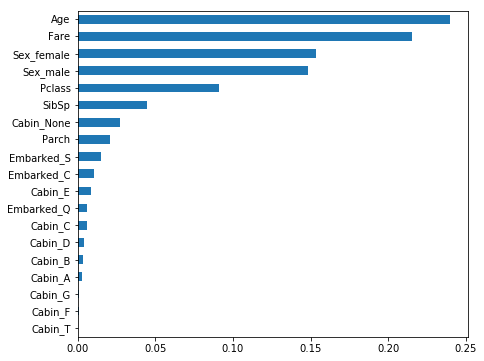

In [35]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

In [36]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 2.16 s per loop


In [37]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 1.51 s per loop


30 trees
C-stat:  0.854147359899

50 trees
C-stat:  0.861747568679

100 trees
C-stat:  0.862170986057

200 trees
C-stat:  0.862490546342

500 trees
C-stat:  0.863238850009

1000 trees
C-stat:  0.863816721525

2000 trees
C-stat:  0.863640963368



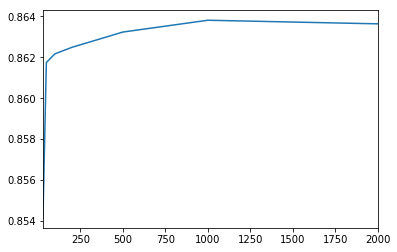

In [38]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print (trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.863816721525

None option
C-stat:  0.863816721525

sqrt option
C-stat:  0.863555747292

log2 option
C-stat:  0.863555747292

0.9 option
C-stat:  0.863955197648

0.2 option
C-stat:  0.86301515781



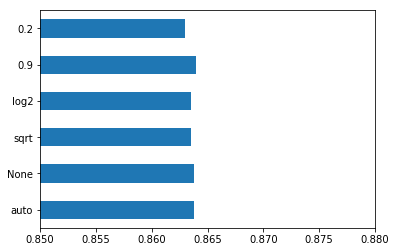

In [39]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  0.863816721525

2 min samples
C-stat:  0.869699293772

3 min samples
C-stat:  0.871430245316

4 min samples
C-stat:  0.873608581259

5 min samples
C-stat:  0.874290309867

6 min samples
C-stat:  0.873976075587

7 min samples
C-stat:  0.873267716955

8 min samples
C-stat:  0.871813717658

9 min samples
C-stat:  0.869251909373

10 min samples
C-stat:  0.867350525677



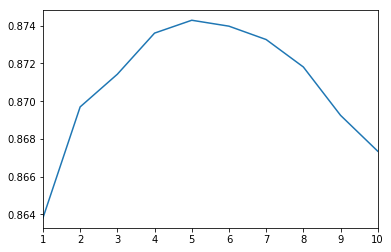

In [40]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print (min_samples, "min samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, min_samples_leaf_options).plot();

In [42]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.9, 
                              min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print ("C-stat: ", roc)

C-stat:  0.874295635872
